# **Introduction**

Cricket is a sport which consists of factors such as influencing match outcomes, player performance, and game dynamics. This project aims to analyze cricket match data and develop some machine learning models to predict various aspects of the game, including match outcomes, player performance, runs scored per over, and the likelihood of wickets falling. By leveraging data-driven approaches, I aim to provide valuable insights and improve predictive accuracy in cricket analytics.

# **Data Preprocessing**

In [ ]:
import pandas as pd
#Reading in the csv file

data1 = pd.read_csv('/content/deliveries.csv')
data2 = pd.read_csv('/content/matches.csv')

data1
data2

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2024,Canada,United States of America,2024/06/01,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,RK Illingworth,Sharfuddoula,L Rusere,RB Richardson,United States of America,NaN,7.0,Group
1,2024,Papua New Guinea,West Indies,2024/06/02,2,Providence Stadium,Providence,West Indies,field,RL Chase,AT Holdstock,Rashid Riaz,HDPK Dharmasena,AJ Pycroft,West Indies,NaN,5.0,Group
2,2024,Oman,Namibia,2024/06/02,3,Kensington Oval,Bridgetown,Namibia,field,D Wiese,J Madanagopal,JS Wilson,Asif Yaqoob,RS Madugalle,NaN,NaN,NaN,Group
3,2024,Sri Lanka,South Africa,2024/06/03,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,CM Brown,RA Kettleborough,AG Wharf,JJ Crowe,South Africa,NaN,6.0,Group
4,2024,Afghanistan,Uganda,2024/06/03,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Ahsan Raza,HDPK Dharmasena,Rashid Riaz,AJ Pycroft,Afghanistan,125.0,NaN,Group
5,2024,Scotland,England,2024/06/04,6,Kensington Oval,Bridgetown,Scotland,bat,NaN,Asif Yaqoob,Nitin Menon,J Madanagopal,RS Madugalle,No Result,NaN,NaN,Group
6,2024,Nepal,Netherlands,2024/06/04,7,Grand Prairie Stadium,Dallas,Netherlands,field,TJG Pringle,L Rusere,RJ Tucker,RK Illingworth,RB Richardson,Netherlands,NaN,6.0,Group
7,2024,Ireland,India,2024/06/05,8,Nassau County International Cricket Stadium,New York,India,field,JJ Bumrah,AG Wharf,CB Gaffaney,CM Brown,DC Boon,India,NaN,8.0,Group
8,2024,Papua New Guinea,Uganda,2024/06/05,9,Providence Stadium,Providence,Uganda,field,Riazat Ali Shah,AT Holdstock,Rashid Riaz,HDPK Dharmasena,J Srinath,Uganda,NaN,3.0,Group
9,2024,Australia,Oman,2024/06/05,10,Kensington Oval,Bridgetown,Oman,field,MP Stoinis,Asif Yaqoob,JS Wilson,Nitin Menon,RS Madugalle,Australia,39.0,NaN,Group


In [ ]:
#Displaying the first 5 rows
data1.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.1,Papua New Guinea,West Indies,TP Ura,A Vala,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.2,Papua New Guinea,West Indies,TP Ura,A Vala,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.3,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.4,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.5,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Displaying the last 5 rows
data1.tail(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
11467,54,2024,2024-06-29,"Kensington Oval, Bridgetown, Barbados",2,19.3,South Africa,India,K Rabada,KA Maharaj,...,1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
11468,54,2024,2024-06-29,"Kensington Oval, Bridgetown, Barbados",2,19.4,South Africa,India,KA Maharaj,K Rabada,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
11469,54,2024,2024-06-29,"Kensington Oval, Bridgetown, Barbados",2,19.5,South Africa,India,K Rabada,KA Maharaj,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11470,54,2024,2024-06-29,"Kensington Oval, Bridgetown, Barbados",2,19.6,South Africa,India,K Rabada,KA Maharaj,...,0,NaN,NaN,NaN,NaN,NaN,caught,K Rabada,NaN,NaN
11471,54,2024,2024-06-29,"Kensington Oval, Bridgetown, Barbados",2,19.7,South Africa,India,A Nortje,KA Maharaj,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Identify categorical columns with missing values
categorical_columns_with_missing_values = ['wicket_type', 'player_dismissed']

# Fill missing categorical values with 'None'
data1[categorical_columns_with_missing_values] = data1[categorical_columns_with_missing_values].fillna('None')

# Display the first few rows to verify the changes
print(data1[categorical_columns_with_missing_values].head())

  wicket_type player_dismissed
0        None             None
1        None             None
2        None             None
3        None             None
4        None             None


In [ ]:
# Identify categorical columns with missing values
categorical_columns_with_missing_values = ['extras', 'player_dismissed']

# Fill missing categorical values with '0 '
data1[categorical_columns_with_missing_values] = data1[categorical_columns_with_missing_values].fillna('0')

# Display the first few rows to verify the changes
print(data1[categorical_columns_with_missing_values].head())

   extras player_dismissed
0       0             None
1       0             None
2       0             None
3       0             None
4       0             None


In [ ]:
columns_to_drop = [
    'wides', 'noballs', 'byes', 'legbyes', 'penalty',
    'wicket_type', 'player_dismissed', 'other_wicket_type', 'other_player_dismissed'
]
data1 = data1.drop(columns=columns_to_drop)

# Display the first few rows to verify the changes
print(data1.head())

   match_id  season  start_date                       venue  innings  ball  \
0         1    2024  2024-06-02  Providence Stadium, Guyana        1   0.1   
1         1    2024  2024-06-02  Providence Stadium, Guyana        1   0.2   
2         1    2024  2024-06-02  Providence Stadium, Guyana        1   0.3   
3         1    2024  2024-06-02  Providence Stadium, Guyana        1   0.4   
4         1    2024  2024-06-02  Providence Stadium, Guyana        1   0.5   

       batting_team bowling_team striker non_striker     bowler  runs_off_bat  \
0  Papua New Guinea  West Indies  TP Ura      A Vala  AJ Hosein             0   
1  Papua New Guinea  West Indies  TP Ura      A Vala  AJ Hosein             1   
2  Papua New Guinea  West Indies  A Vala      TP Ura  AJ Hosein             0   
3  Papua New Guinea  West Indies  A Vala      TP Ura  AJ Hosein             0   
4  Papua New Guinea  West Indies  A Vala      TP Ura  AJ Hosein             0   

   extras  
0       0  
1       0  
2       

In [ ]:
#Checking if there are any null values that are present in the dataset before starting data visualisation
data1.isnull().sum()

match_id        0
season          0
start_date      0
venue           0
innings         0
ball            0
batting_team    0
bowling_team    0
striker         0
non_striker     0
bowler          0
runs_off_bat    0
extras          0
dtype: int64

Now that the data has been preprocessed and cleaned I will now start creating some visualization based on this current dataset.

# **Data visualization**

### 1. Runs Distrubution

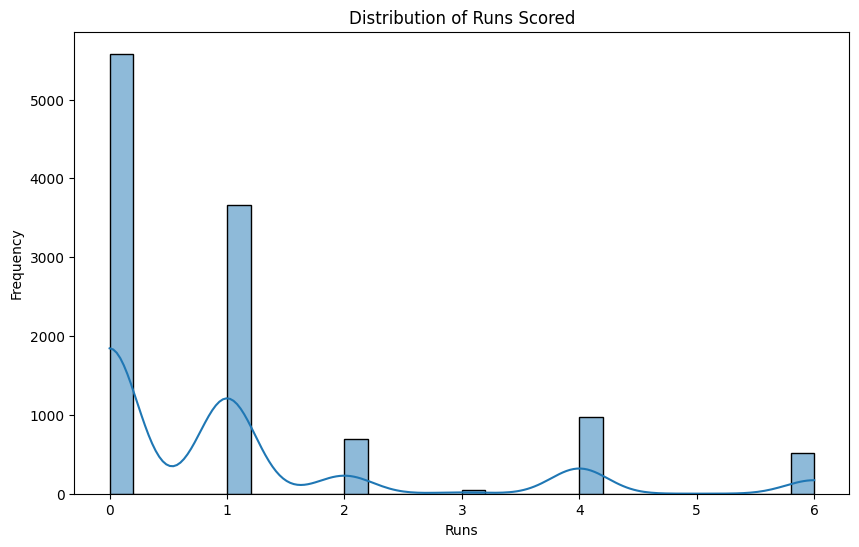

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Setting the plot figure
plt.figure(figsize=(10, 6))
sns.histplot(data1['runs_off_bat'], bins=30, kde=True)
#Title of the graph
plt.title('Distribution of Runs Scored')
#X-axis label
plt.xlabel('Runs')
#Y-axis label
plt.ylabel('Frequency')
plt.show()

### 2. Team performance

<ipython-input-12-5108f1106319>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runs_off_bat', y='batting_team', data=team_performance, palette='viridis')


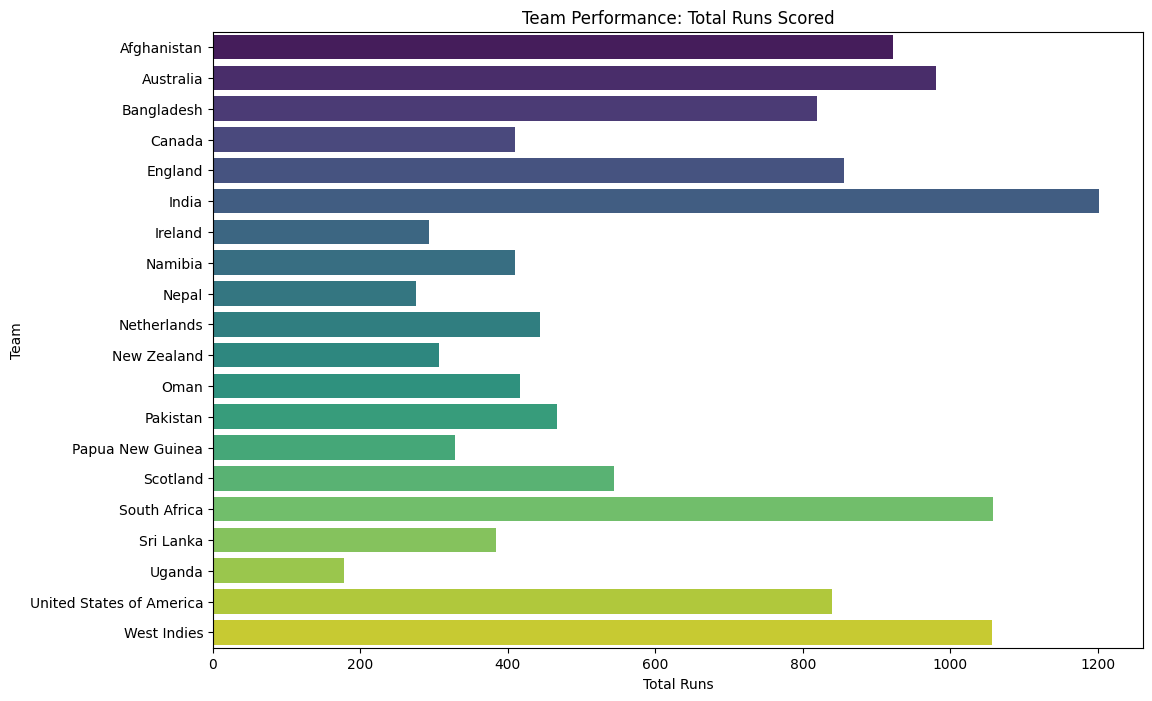

In [ ]:
# Aggregate data for team performance
team_performance = data1.groupby('batting_team')['runs_off_bat'].sum().reset_index()

# Plot team performance
plt.figure(figsize=(12, 8))
sns.barplot(x='runs_off_bat', y='batting_team', data=team_performance, palette='viridis')
plt.title('Team Performance: Total Runs Scored')
plt.xlabel('Total Runs')
plt.ylabel('Team')
plt.show()


### 3. Player performance

<ipython-input-13-83b3eb0d23c4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runs_off_bat', y='striker', data=top_batsmen, palette='magma')


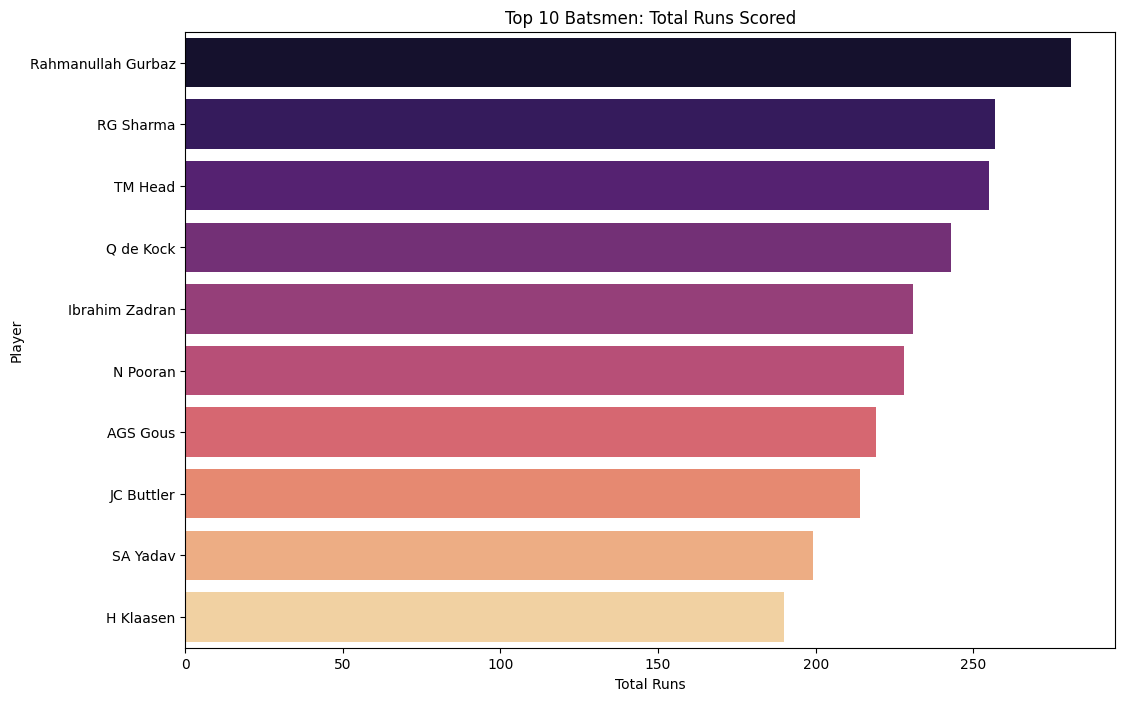

In [ ]:
player_performance = data1.groupby('striker')['runs_off_bat'].sum().reset_index()
top_batsmen = player_performance.sort_values(by='runs_off_bat', ascending=False).head(10)

# Plot top 10 batsmen
plt.figure(figsize=(12, 8))
sns.barplot(x='runs_off_bat', y='striker', data=top_batsmen, palette='magma')
plt.title('Top 10 Batsmen: Total Runs Scored')
plt.xlabel('Total Runs')
plt.ylabel('Player')
plt.show()

### 4. Total runs scored at Top 10 Venues

<ipython-input-14-84ae34dcb730>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runs_off_bat', y='venue', data=top_venues, palette='magma')


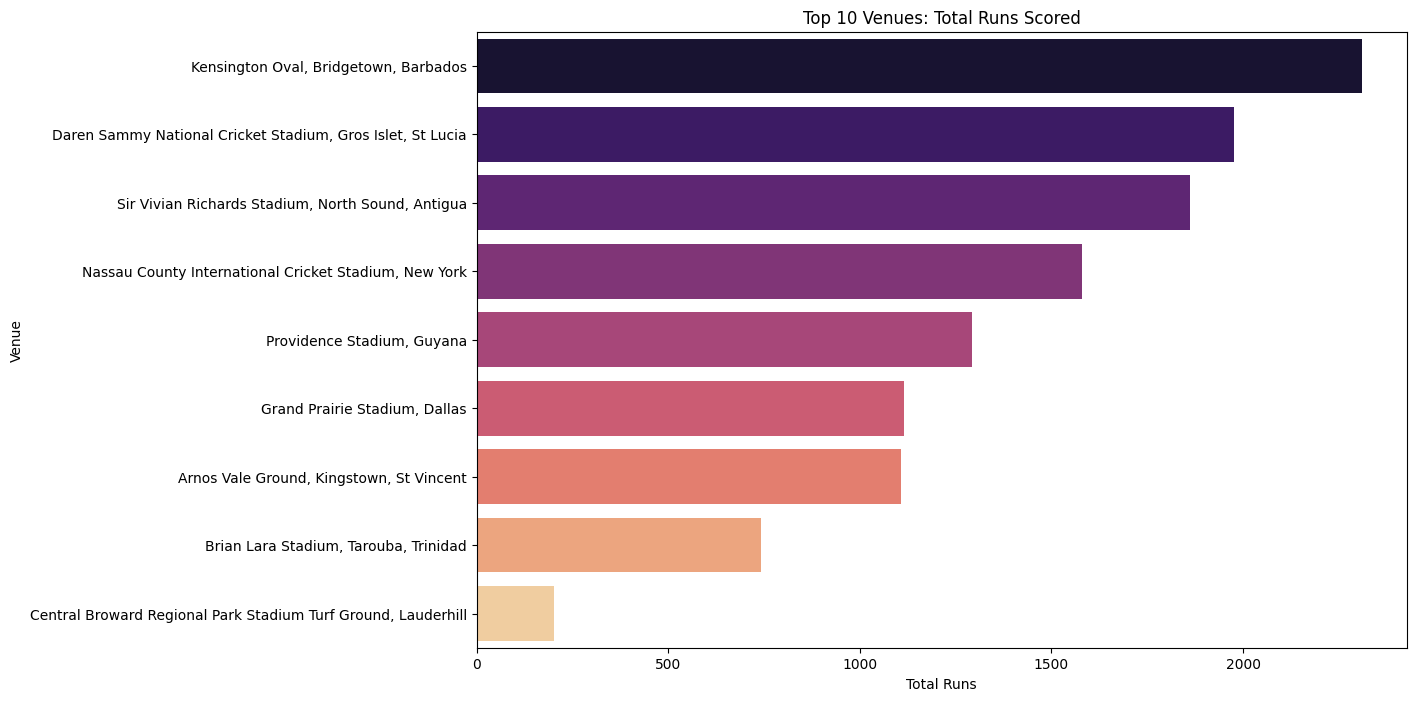

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'venue' and sum the 'runs_off_bat' to get total runs scored at each venue
venue_performance = data1.groupby('venue')['runs_off_bat'].sum().reset_index()

# Sort the venues by total runs scored and get the top 10 venues
top_venues = venue_performance.sort_values(by='runs_off_bat', ascending=False).head(10)

# Plot the top 10 venues
plt.figure(figsize=(12, 8))
sns.barplot(x='runs_off_bat', y='venue', data=top_venues, palette='magma')
plt.title('Top 10 Venues: Total Runs Scored')
plt.xlabel('Total Runs')
plt.ylabel('Venue')
plt.show()


<ipython-input-25-f02787e245a0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winner_counts.index, y=winner_counts.values, palette='magma')


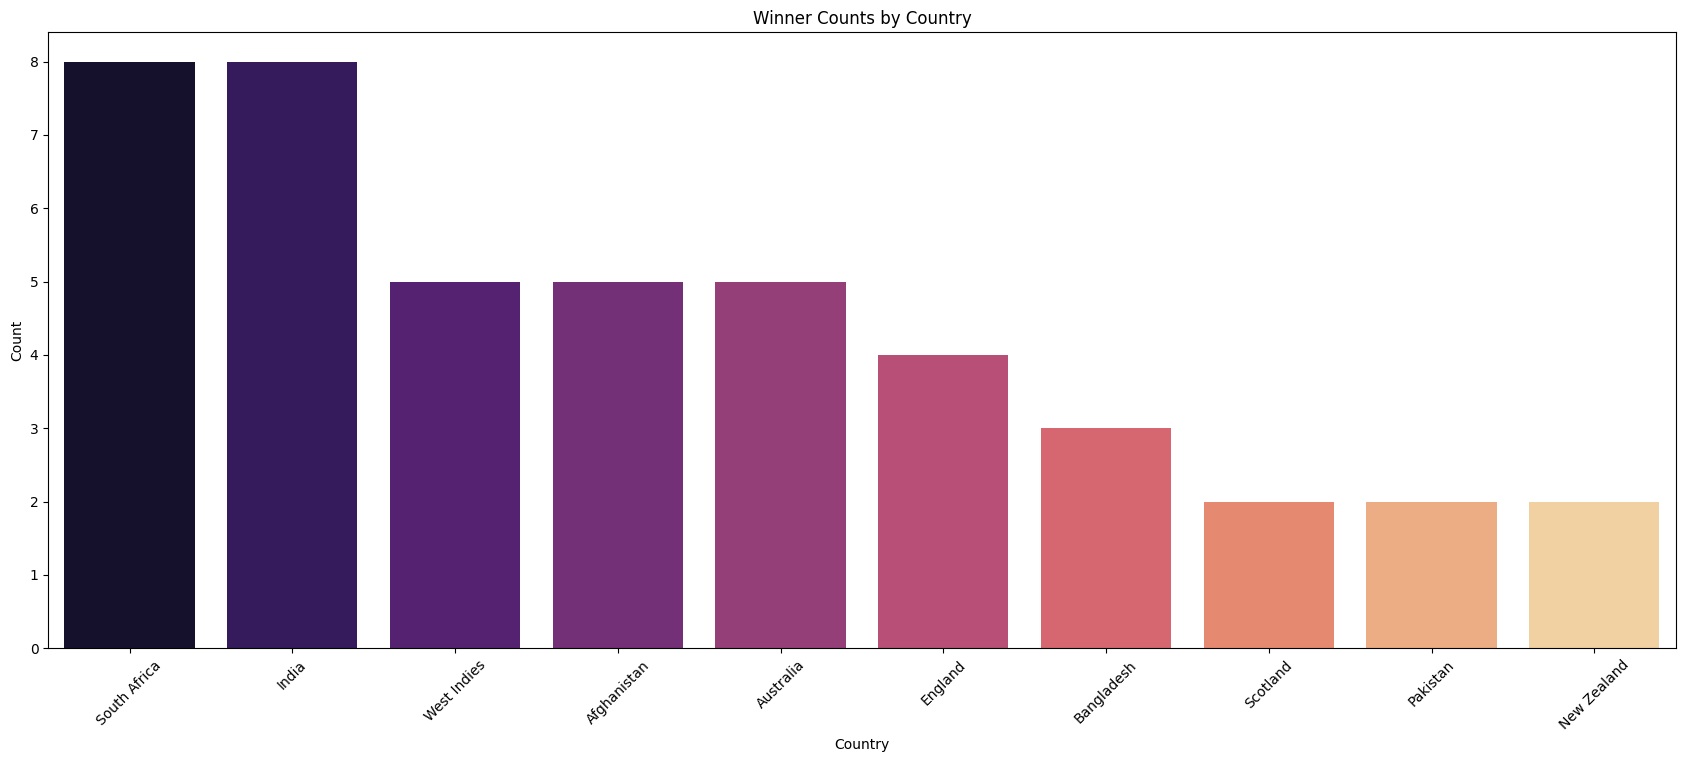

In [ ]:
winner_counts = data2['winner'].value_counts().head(10)

# Plot the winner counts
plt.figure(figsize=(21, 8))
sns.barplot(x=winner_counts.index, y=winner_counts.values, palette='magma')
plt.title('Winner Counts by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#**Machine Learning Prediction Models**



## Feature Engineering

Before creating the prediction models I will be using a machine learning technique (feature engineering). Which will allow me to levarges data to create new variables that aren't in the training set. Which can lead to a higher efficiency of the models which will be created.

## Logistic Regression

In [ ]:
# One-Hot Encode categorical variables
data_encoded = pd.get_dummies(data1, columns=[
    'venue', 'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler'
])

# Create a target variable for match outcome
data_encoded['match_outcome'] = (data_encoded['runs_off_bat'] > 100).astype(int)

# Features and target
X = data_encoded.drop(columns=['match_outcome'])
y = data_encoded['match_outcome']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from datetime import datetime  # For handling start_date
from joblib import dump  # For saving the model

# Create a target variable for match outcome
data_encoded['match_outcome'] = (data_encoded['runs_off_bat'] > 100).astype(int)

# Features and target
X = data_encoded.drop(columns=['match_outcome'])
y = data_encoded['match_outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess data (handle start_date and standardize features)
scaler = StandardScaler()
def extract_day_of_week(date_str):
  return datetime.strptime(date_str, "%Y-%m-%d").weekday()

X_train['day_of_week'] = X_train['start_date'].apply(extract_day_of_week)
X_test['day_of_week'] = X_test['start_date'].apply(extract_day_of_week)
X_train = X_train.drop(columns=['start_date'])
X_test = X_train.drop(columns=['start_date'])
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model with increased iterations
model = LogisticRegression(max_iter=2000, C=1.0)

try:
  model.fit(X_train_scaled, y_train)
  # Save the model
  dump(model, 'cricket_match_predictor.joblib')
  print("Model trained and saved successfully!")
except Exception as e:
  print(f"An error occurred during training: {e}")

# Prediction and evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


KeyError: "['start_date'] not found in axis"